In [3]:
# Code for: <Add description here>
%load_ext autoreload
%autoreload 2
import cmcrameri.cm as cm  # Importing the cmcrameri colormaps
#%run ct_data.py '../crunchtope_model/results.nc' -c volume
%run pf_data.py '../pflotran_model/mg_ca_equal.nc'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Primary minerals: ['Anorthite', 'Albite', 'Diopside', 'Hedenbergite', 'Forsterite', 'Fayalite']
Secondary minerals: ['Tremolite', 'Prehnite', 'Talc', 'Quartz', 'Saponite_Mg', 'Epidote', 'Zoisite', 'Chamosite', 'Clinochlore', 'Analcime', 'Anhydrite', 'Calcite', 'Annite']
Primary mineral groups: {'olivine': ['Forsterite', 'Fayalite'], 'clinopyroxenes': ['Diopside', 'Hedenbergite'], 'plagioclases': ['Anorthite', 'Albite']}
Secondary mineral groups: {'clays': ['Saponite_Mg', 'Chamosite', 'Clinochlore'], 'zeolites': ['Analcime'], 'amphiboles': ['Tremolite'], 'inosilicates': ['Prehnite'], 'talc': ['Talc'], 'epidotes': ['Epidote', 'Zoisite'], 'sulfates': ['Anhydrite'], 'carbonates': ['Calcite'], 'quartz': ['Quartz'], 'mica': ['Annite']}


In [4]:
#Parameters
time = 1000

In [70]:
# Code for: <Add description here>
import matplotlib.pyplot as plt
from itertools import cycle
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

def custom_color_cycler():
    import matplotlib.pyplot as plt
    from cycler import cycler
    import cmcrameri.cm as cm  # Importing the cmcrameri colormaps

    # Define the number of discrete colors you want
    n_colors = 6

    # Generate a colormap from cmcrameri (e.g., 'vik' colormap)
    colormap = cm.imola

    # Get discrete colors by sampling the colormap
    colors = [colormap(i / n_colors) for i in range(n_colors)]

    return colors

def plot_flux(ax, inset_ax, concentrations, data, plot_var,range_sets, legend_entries, crunchtope=False, linestyle='-'):
    """
    plot_flux: <Add description of function>
    """
    if crunchtope:
        dims = ['X', 'Y', 'Z']
    else:
        dims = ['x', 'y', 'z']
    
    # Apply the color cycler to matplotlib
    colours = iter(custom_color_cycler())
    
    for conc_range, range_set, legend_entry in zip(concentrations, range_sets, legend_entries):
        # Processing data
        extracted_data = data[plot_var].sel(time=time).isel(file_number=slice(range_set[0], range_set[1] + 1)).mean(dim=dims)
        if plot_var == 'Anhydrite_VF':
            # Scale up by volume
            extracted_data = data[plot_var].sel(time=time).isel(file_number=slice(range_set[0], range_set[1] + 1)).sum(dim=dims)
            volume = extracted_data.to_numpy() * 46.9 * 46.9 * 100 # m^3
            moles = volume_to_moles(volume, molar_volume)
            flux = moles / time * 65000e3 / 100 / 1e12 # tmol/yr
            extracted_data = flux
        
        ax.plot(conc_range, extracted_data, label=legend_entry, color=next(colours), linestyle=linestyle)
        print(f'For {legend_entry}, the values are {extracted_data}')

In [71]:
# Code for: <Add description here>

def total_volume(data, mineral):
    """
    total_volume: <Add description of function>
    """
    # Sum variables over all coordinates and select the final time 
    total_vf = data.sum(dim=('x','y','z')).sel(time=time)[mineral].to_numpy()
    total_volume = total_vf * 46.9 * 46.9 * 100 # m^3 

    return total_volume

def volume_to_moles(volume, molar_volume):
    """
    volume_to_moles: <Add description of function>
    """
    moles = volume / molar_volume
    return moles

molar_volume = 46.01 * (0.01 ** 3) # cm3/mol

vol = total_volume(pf_data, "Anhydrite_VF")
moles = volume_to_moles(vol, molar_volume)
flux = moles / time *65000e3 /100 /1e12
#s_moles_to_flux(moles) / 100

For 10.3, the values are [0.03804555 0.13477407 0.21894021 0.29768547 0.37575361]
For 20, the values are [0.03812885 0.14096629 0.25749618 0.34216879 0.4209348 ]
For 30, the values are [0.0381831  0.14163753 0.26524275 0.38275514 0.46854208]
For 40, the values are [0.03823015 0.14189359 0.26607934 0.39120835 0.51015101]
For 50, the values are [0.0382699  0.14204187 0.26642021 0.39253277 0.51954618]
For 60, the values are [0.03830445 0.14214219 0.26661574 0.39333833 0.52119933]


/tmp/ipykernel_210784/1006468186.py:53: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()
/tmp/ipykernel_210784/1006468186.py:54: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


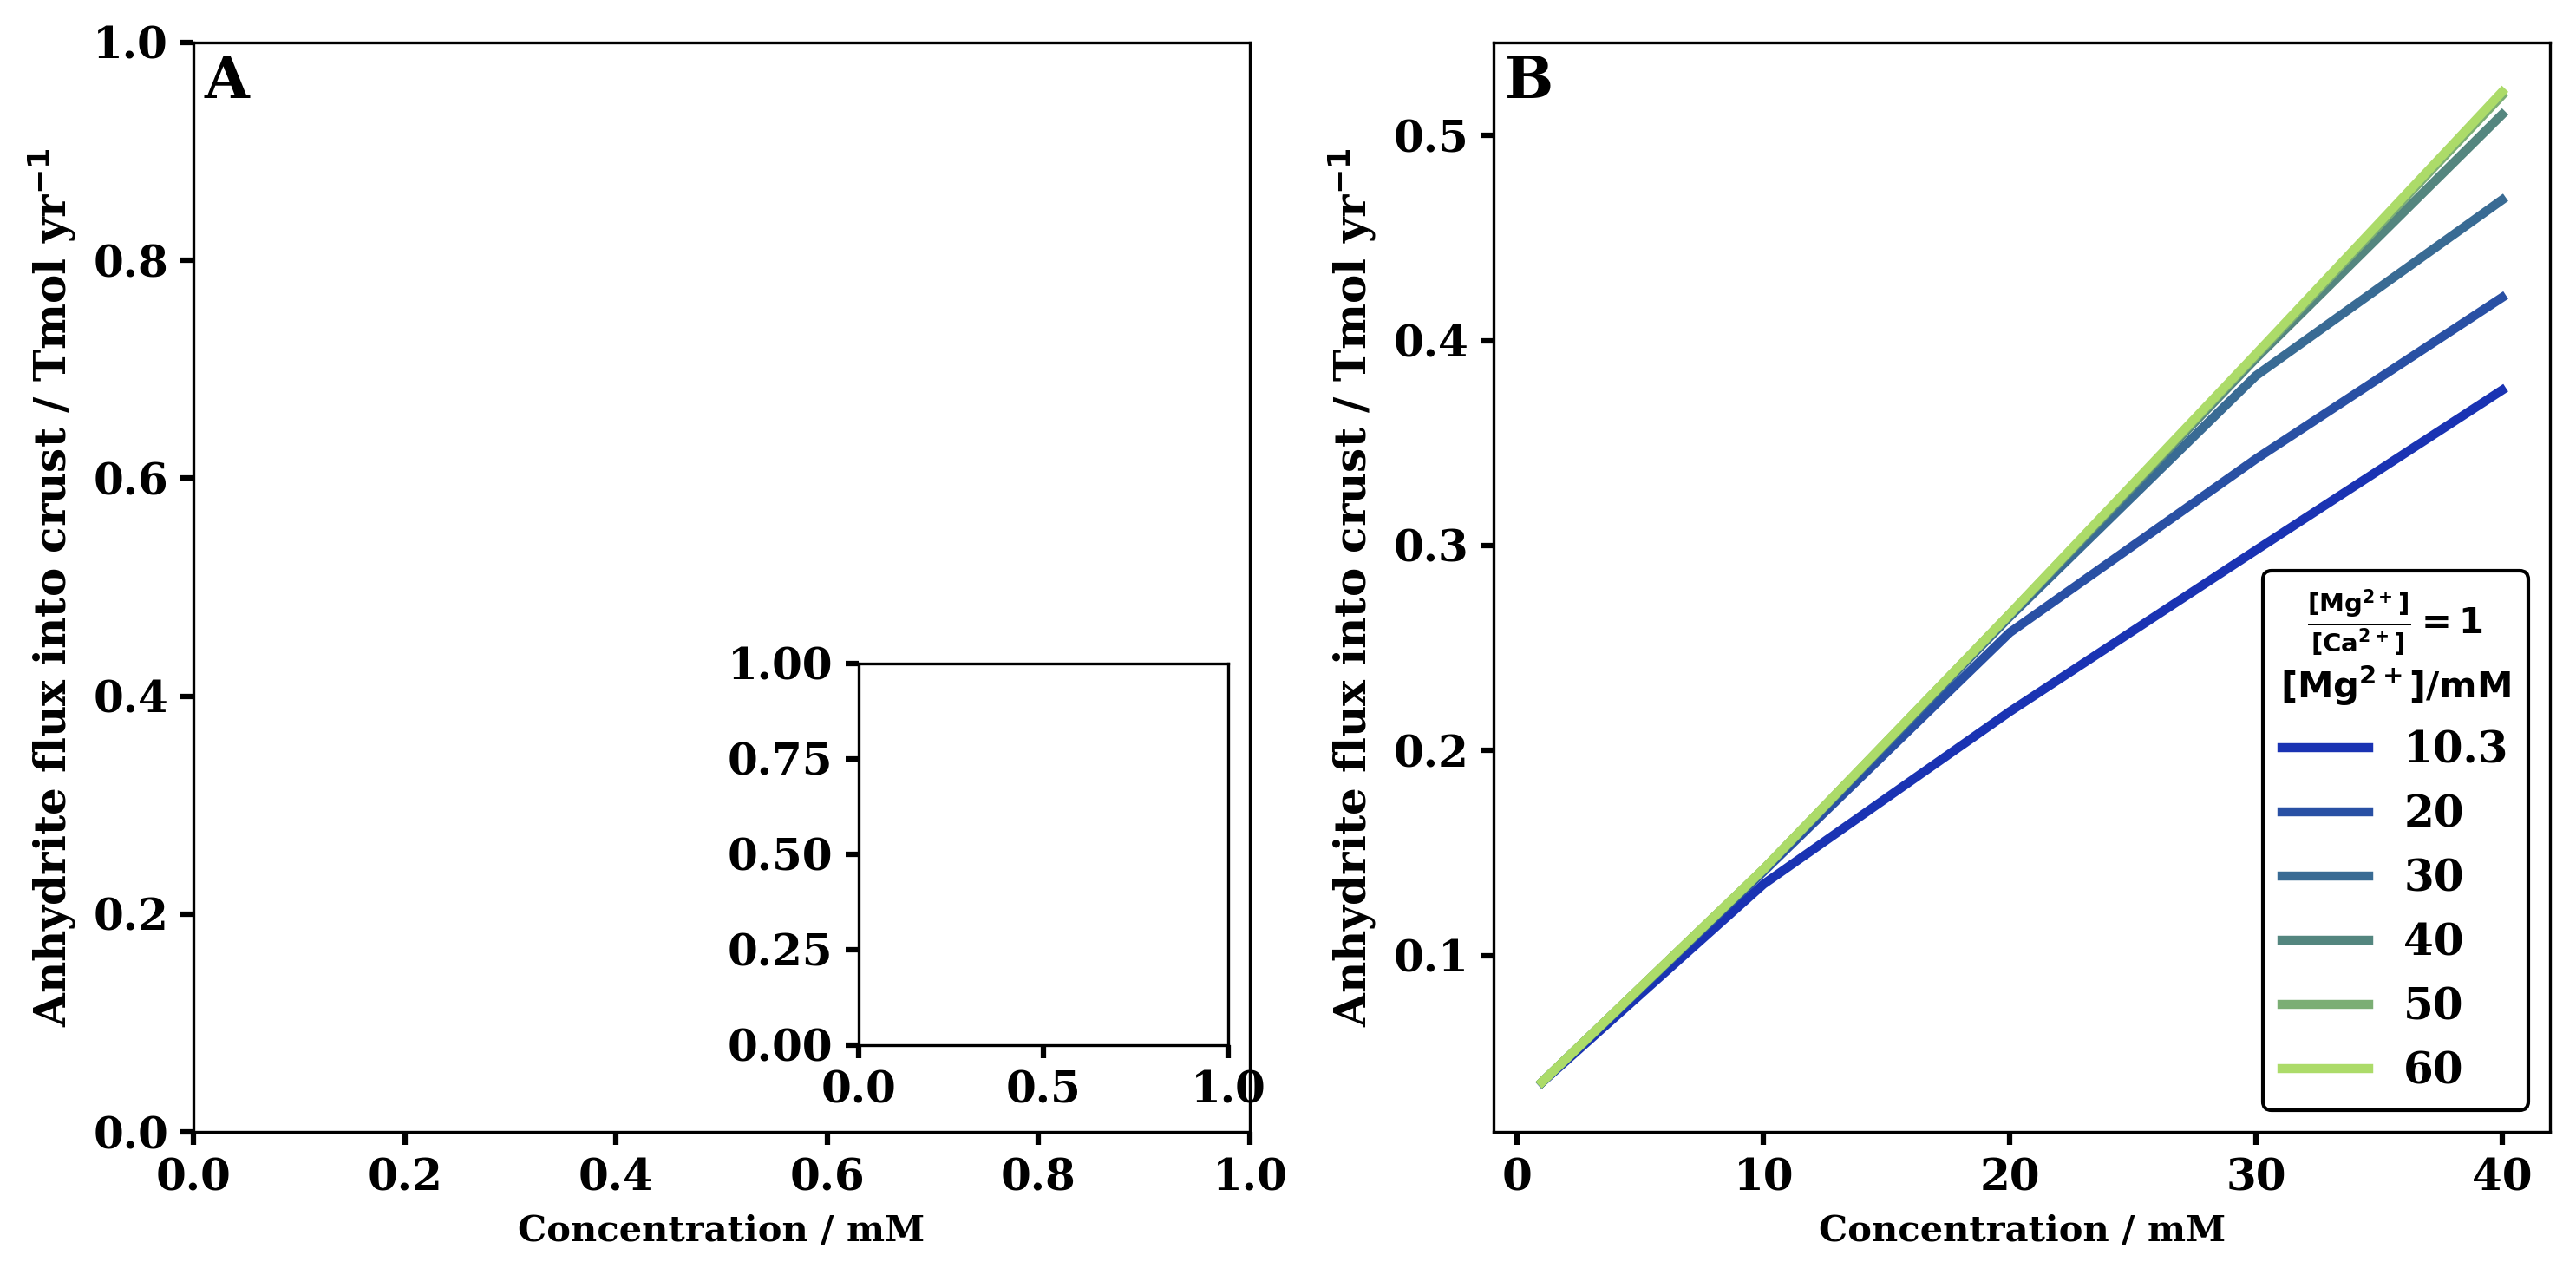

In [89]:
import matplotlib as mpl
from matplotlib import pyplot as plt
plt.style.use('custom.mplstyle')
from cmcrameri import cm
import numpy as np
import copy
import string


# Create figure and axes
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax = ax.flatten()

fontsize = fig.bbox_inches.width * 1.2

# Add capital letter labels to the subplots
for i, axis in enumerate(ax):
    axis.text(0.01, 0.99, string.ascii_uppercase[i], transform=axis.transAxes,
              fontsize=16, fontweight='bold', va='top')

# Example data and parameters
leg_entries = [10.3, 20, 30, 40, 50, 60]
range_sets = [(0, 4), (5, 9), (10, 14), (15, 19), (20, 24), (25, 29)]
concentrations = [[1, 10, 20, 30, 40],  # SO4
                    [1, 10, 20, 30, 40],
                    [1, 10, 20, 30, 40],
                    [1, 10, 20, 30, 40],
                    [1, 10, 20, 30, 40],
                    [1, 10, 20, 30, 40]]

plot_var = 'Anhydrite_VF'
plot_flux(ax[1], inset_ax, concentrations, pf_data, plot_var, range_sets, leg_entries)

# Add a legend to the first axis
title = r'$\frac{[\mathrm{Mg}^{2+}]}{[\mathrm{Ca}^{2+}]} = 1$' + '\n' + r'$[\mathrm{Mg}^{2+}] / \mathrm{mM}$'
legend = ax[1].legend(loc='lower right', fontsize=fontsize, title=title)
legend._legend_title_box._text.set_ha('center')  # Center align the legend title
for axis in ax:
    axis.set_ylabel('Anhydrite flux into crust / Tmol yr$^{-1}$', fontsize=fontsize)
    axis.set_xlabel('Concentration / mM')
    #axis.set_ylim(0, 0.5)

# Show and save the figure
fig.tight_layout()
fig.show()
fig.savefig('output/figure_5.png', dpi=300, transparent=True)

